# DS-210: Programming for Data Science


# Lecture 3: Decision trees (continued).

## New students
* We're using Piazza and Blackboard)

## Everyone
* Jupyter Notebook / Jupyter Lab
* You can use it to open lecture slides
* Homework 1 out on Wed (due next Wed)

## Last time

* Supervised vs. unsupervised learning
* Decision trees

## Function arguments in Python: via position or name

In [1]:
# simplest function definition
def foo(x, y, z):
    return x + 10 * y + 100 * z

print(foo(1,2,3))

321


In [2]:
# add default values
def moo(x, y = 0, z = 0):
    return x + 10 * y + 100 * z

# only one argument is mandatory
print(moo(1),moo(1,2),moo(1,2,3))

1 21 321


In [3]:
# can refer to all or some arguments via variable names
print(foo(z = 3, y = 2, x = 1))
print(foo(1, z = 3, y = 2))
#won't work: print(foo(z = 3, y = 2, 1))

321
321


In [4]:
# can arbitrarily skip over arguments
print(moo(1, z = 3))

301


## Decision trees

Popular machine learning tool for predictive data analysis:
* start at the root and keep going down
* every internal node labeled with a condition
  - if satisfied, go left
  - if not satisfied, go right
* leafs labeled with predicted labels

<div align="center">
Does a player like bluegrass?
<img alt="[Decision tree]" align="center" width="60%" src="dt.png"/></div>

<div align="center">
    <b>Big challenge: finding a decision tree that matches data!</b>
</div>

## Heuristics for constructing decision trees

* Start from a single node with all samples
* Iterate:
  * select a node
  * use the samples in the node to split it into children
  * pass each sample to respective child
* Label leafs



<div align="center">
Favorite color?
<img alt="[Decision tree]" align="center" width="60%" src="dt-1.png"/></div>

## Heuristics for constructing decision trees

* Start from a single node with all samples
* Iterate:
  * select a node
  * use the samples in the node to split it into children
  * pass each sample to respective child
* Label leafs



<div align="center">
Favorite color?
<img alt="[Decision tree]" align="center" width="60%" src="dt-2.png"/></div>

## Heuristics for constructing decision trees

* Start from a single node with all samples
* Iterate:
  * select a node
  * use the samples in the node to split it into children
  * pass each sample to respective child
* Label leafs



<div align="center">
Favorite color?
<img alt="[Decision tree]" align="center" width="60%" src="dt-3.png"/></div>

## Heuristics for constructing decision trees

* Start from a single node with all samples
* Iterate:
  * select a node
  * use the samples in the node to split it into children
  * pass each sample to respective child
* Label leafs



<div align="center">
Favorite color?
<img alt="[Decision tree]" align="center" width="60%" src="dt-4.png"/></div>

## Split selection

* Typical heuristic: select a split that improves classification most
* Various measures of "goodness" or "badness":
  * Information gain
  * Ginni impurity
  * Variance


## Popular algorithms

* ID3
* C4.5
* C5.0
* CART (used by `scikit-learn`)

You can read more about those algorithms at https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart  

and see the mathematical formulation for CART here: https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation

## Advantages and disadvantages of decision trees

Advantages:
* easy to interpret
* not much data preparation needed
* categorical and numerical data
* relatively fast

Disadvantages:
* can be very sensitive to data changes
* can create an overcomplicated tree that matches the sample, but not the underlying problem
* hard to find an optimal tree

## Decision tree construction using `scikit-learn`

**Note: ignore machine learning context for now**

First, we read our sample data and add information who likes pizza

In [18]:
# Let's read our sample data
import pandas as pd
data = pd.read_csv('players.csv')
data

,Name,Number,PPG,YearBorn,TotalPoints
0,Kareem,33,24.6,1947,38387
1,Karl,32,25.0,1963,36928
2,LeBron,23,27.0,1984,36381
3,Kobe,24,25.0,1978,33643
4,Michael,23,30.1,1963,32292


In [19]:
likes_pizza = [1,0,0,1,0]
data['LikesPizza'] = likes_pizza
data

,Name,Number,PPG,YearBorn,TotalPoints,LikesPizza
0,Kareem,33,24.6,1947,38387,1
1,Karl,32,25.0,1963,36928,0
2,LeBron,23,27.0,1984,36381,0
3,Kobe,24,25.0,1978,33643,1
4,Michael,23,30.1,1963,32292,0


## Visualized

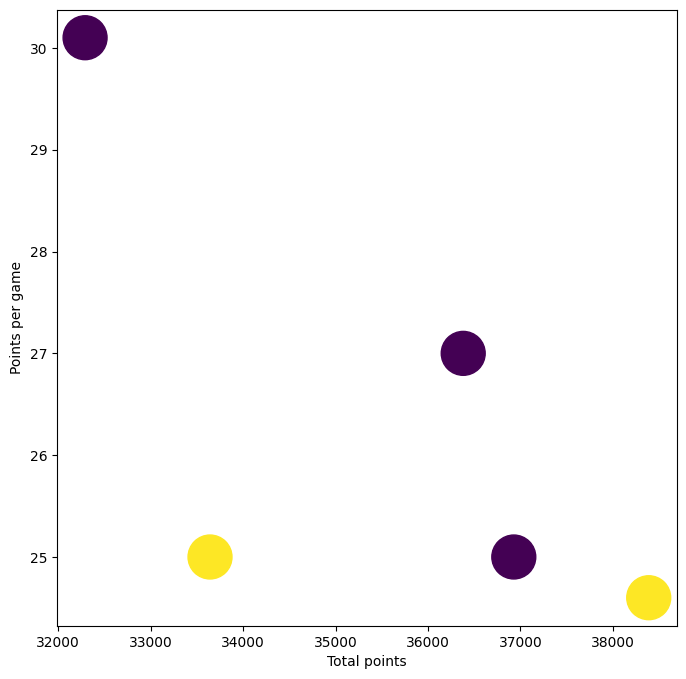

In [20]:
import matplotlib.pyplot as plt
data['radius'] = [1000 for x in data['PPG']]
fig,ax = plt.subplots(figsize=(8,8))
ax.set_xlabel('Total points')
ax.set_ylabel('Points per game')
ax.scatter('TotalPoints','PPG','radius','LikesPizza',data=data);

## Data selection
* set of inputs: `X`
* set of desired outputs:`y`

In [21]:
data

,Name,Number,PPG,YearBorn,TotalPoints,LikesPizza,radius
0,Kareem,33,24.6,1947,38387,1,1000
1,Karl,32,25.0,1963,36928,0,1000
2,LeBron,23,27.0,1984,36381,0,1000
3,Kobe,24,25.0,1978,33643,1,1000
4,Michael,23,30.1,1963,32292,0,1000


In [22]:
features = ['PPG','YearBorn','TotalPoints']
X = data[features]
y = data['LikesPizza']
print(X,y,sep='\n\n')

    PPG  YearBorn  TotalPoints
0  24.6      1947        38387
1  25.0      1963        36928
2  27.0      1984        36381
3  25.0      1978        33643
4  30.1      1963        32292

0    1
1    0
2    0
3    1
4    0
Name: LikesPizza, dtype: int64


## Decision tree construction
* How to decide which feature should be located at the root node,
* Most accurate feature to serve as internal nodes or leaf nodes,
* How to divide tree,
* How to measure the accuracy of splitting tree and many more.


In [26]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_leaf_nodes = 3)
clf = clf.fit(X,y)
# clf = clf.fit(X.values, y)
result = clf.predict([[22.4, 1975, 30000]])
result

/Users/kthanasi/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

## Visualizing the outcome

In [7]:
from sklearn import tree
text = tree.export_text(clf,feature_names = features)
print(text)

|--- PPG <= 26.00
|   |--- TotalPoints <= 35285.50
|   |   |--- class: 1
|   |--- TotalPoints >  35285.50
|   |   |--- class: 0
|--- PPG >  26.00
|   |--- class: 0



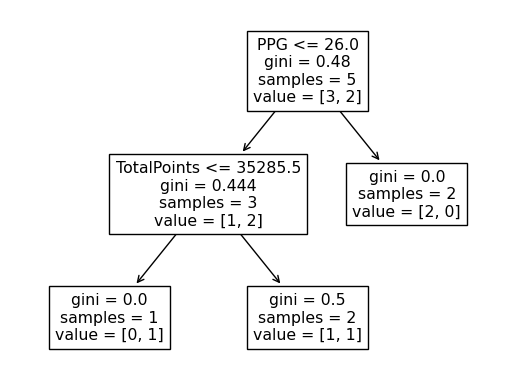

In [16]:
tree.plot_tree(clf,feature_names = features);

In [10]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf2 = tree.DecisionTreeRegressor()
clf2 = clf2.fit(X, y)
clf2.predict([[1, 1]])

array([0.5])

## Closing remarks
* **Suggested reading:** https://scikit-learn.org/stable/modules/tree.html
* **Next time:** using this in the context of a data science pipeline
* Homework 1 out on Wednesday.